<a href="https://colab.research.google.com/github/JakeOh/202103_itw_pyda_wkd/blob/main/da10_babynames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # 배열
import pandas as pd  # 데이터 프레임
import matplotlib.pyplot as plt  # 그래프
import seaborn as sns  # 그래프

# 데이터 프레임 합치기(concat)

In [3]:
df1 = pd.DataFrame(data=np.arange(6).reshape((3, 2)), 
                   columns=['data1', 'data2'])
df1

,data1,data2
0,0,1
1,2,3
2,4,5


In [4]:
df2 = pd.DataFrame(data=np.arange(4).reshape((2, 2)), 
                   columns=['data2', 'data3'])
df2

,data2,data3
0,0,1
1,2,3


In [5]:
result1 = pd.concat([df1, df2], axis=0)
result1

,data1,data2,data3
0,0.0,1,NaN
1,2.0,3,NaN
2,4.0,5,NaN
0,NaN,0,1.0
1,NaN,2,3.0


In [6]:
result2 = pd.concat([df1, df2], axis=1)
result2

,data1,data2,data2,data3
0,0,1,0.0,1.0
1,2,3,2.0,3.0
2,4,5,NaN,NaN


# babynames 데이터 셋

https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{year}.txt 파일들을 사용

In [10]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob1880.txt'
df = pd.read_csv(file_path, header=None, names=['name', 'gender', 'count'])
# 파일에는 헤더(컬럼 이름 등)가 없기 때문에 header=None이라고 설정.
# 데이터 프레임의 컬럼 이름을 설정하기 위해서 names 파라미터에 값을 전달.
df.head()

,name,gender,count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [11]:
df['year'] = 1880
df.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [13]:
yobs = []
# empty list: 파일을 읽어서 데이터 프레임을 만들 때마다 리스트에 추가.

for year in range(1880, 2011):  # 1880 <= year < 2011 연도에 대해서 반복
    # 연도를 붙여서 파일 경로(URL) 문자열을 만듦.
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{year}.txt'
    # github에 저장된 파일을 읽어서 데이터 프레임을 생성.
    df = pd.read_csv(file_path, header=None, 
                     names=['name', 'gender', 'count'])
    # 데이터 프레임에 연도 컬럼을 추가
    df['year'] = year
    yobs.append(df)

In [14]:
len(yobs)  # 2010 - 1880 + 1

131

In [16]:
yobs[130]

,name,gender,count,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [17]:
yob_df = pd.concat(yobs, axis=0, ignore_index=True)

In [18]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   count   1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [19]:
yob_df.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [21]:
# 연도별 신생아 수 -> 연도(year)별 count 컬럼의 합계(sum)
births_by_year = yob_df.groupby('year')['count'].sum()
births_by_year

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: count, Length: 131, dtype: int64

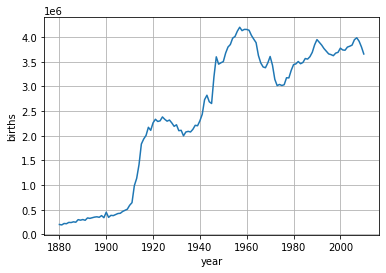

In [24]:
plt.plot(births_by_year.index, births_by_year.values)
plt.grid()
plt.xlabel('year')
plt.ylabel('births')
plt.show()

In [26]:
# 연도별 성별 신생아 수
result = yob_df.groupby(['year', 'gender'])['count'].sum()
result

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: count, Length: 262, dtype: int64

In [27]:
result.unstack()

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


In [28]:
result = yob_df.pivot_table(values='count',    # 집계함수를 적용할 변수
                            index='year',      # 인덱스로 사용할 변수
                            columns='gender',  # 컬럼으로 사용할 변수
                            aggfunc='sum')     # 집계 함수
result

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


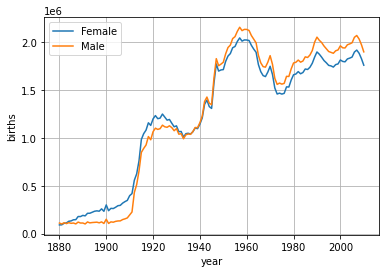

In [32]:
plt.plot(result.index, result['F'], label='Female')
plt.plot(result.index, result['M'], label='Male')

plt.legend()
plt.xlabel('year')
plt.ylabel('births')
plt.grid()
plt.show()

## seaborn을 이용한 시각화

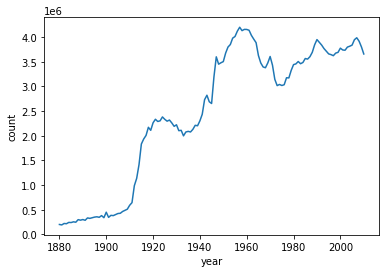

In [34]:
# 연도별 신생아 숫자 시각화
sns.lineplot(data=yob_df, x='year', y='count',
             estimator='sum', err_style=None)
plt.show()

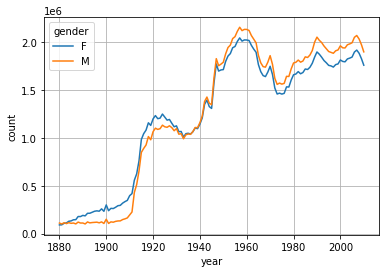

In [35]:
# 연도별 성별 신생아 숫자 시각화
sns.lineplot(data=yob_df, x='year', y='count', hue='gender',
             estimator='sum', err_style=None)
plt.grid()
plt.show()